https://github.com/rayryeng/datasciencecoursera/blob/master/RepData_PeerAssessment1/PA1_template.Rmd

steps,date,interval
NA,2012-10-01,0
NA,2012-10-01,5
NA,2012-10-01,10
NA,2012-10-01,15
NA,2012-10-01,20
NA,2012-10-01,25


date,meanStepsPerDay
2012-10-01,NaN
2012-10-02,0.43750
2012-10-03,39.41667
2012-10-04,42.06944
2012-10-05,46.15972
2012-10-06,53.54167


date,medianStepsPerDay
2012-10-01,NA
2012-10-02,0
2012-10-03,0
2012-10-04,0
2012-10-05,0
2012-10-06,0


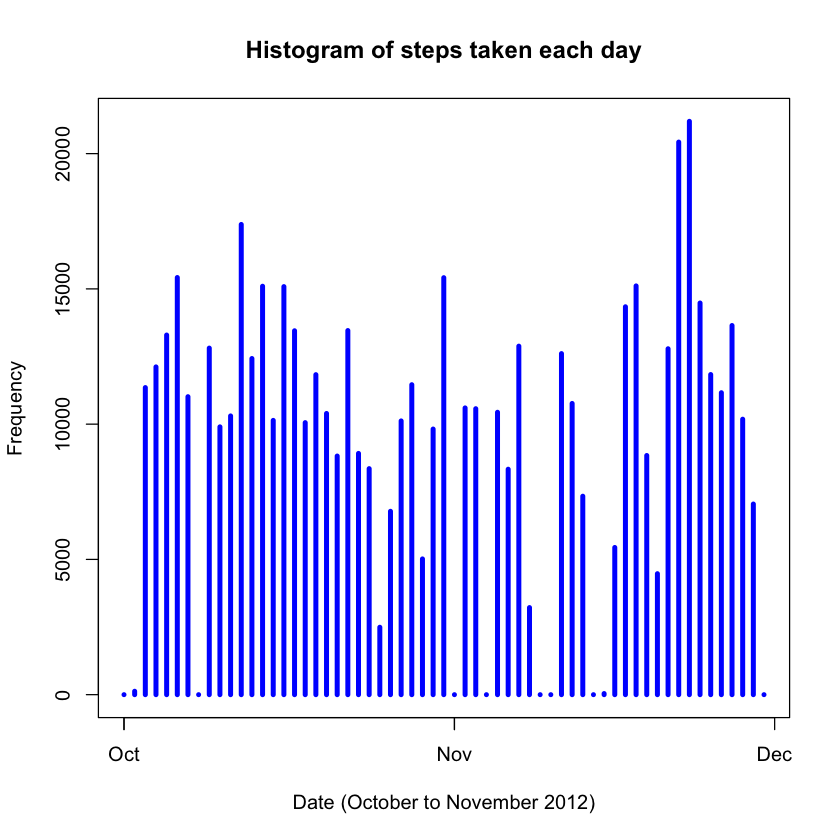

In [2]:
dat <- read.csv("activity.csv")

head(dat)

# strptime converts character vectors to class "POSIXlt"
dates <- strptime(dat$date, "%Y-%m-%d")
dat$date <- dates
#dates$yday

# Keep a list of all possible days
uniqueDates <- unique(dates)
# Keep a list of all possible intervals
uniqueIntervals <- unique(dat$interval)

# First split up the data frame for steps by day
# split is used for grouping
stepsSplit <- split(dat$steps, dates$yday)
# Next find the total number of steps over each day
totalStepsPerDay <- sapply(stepsSplit, sum, na.rm=TRUE)
# Plot a (pseudo) histogram where the x-axis denotes the day
# and the y-axis denotes the total number of steps taken 
# for each day
plot(uniqueDates, totalStepsPerDay, main="Histogram of steps taken each day", 
     xlab="Date (October to November 2012)", ylab="Frequency", type="h", lwd=4, col="blue")

meanStepsPerDay <- sapply(stepsSplit, mean, na.rm=TRUE)
meanDataFrame <- data.frame(date=uniqueDates, meanStepsPerDay=meanStepsPerDay, row.names=NULL)
head(meanDataFrame)

medianStepsPerDay <- sapply(stepsSplit, median, na.rm=TRUE)
medianDataFrame <- data.frame(date=uniqueDates, medianStepsPerDay=medianStepsPerDay, row.names=NULL)
head(medianDataFrame)

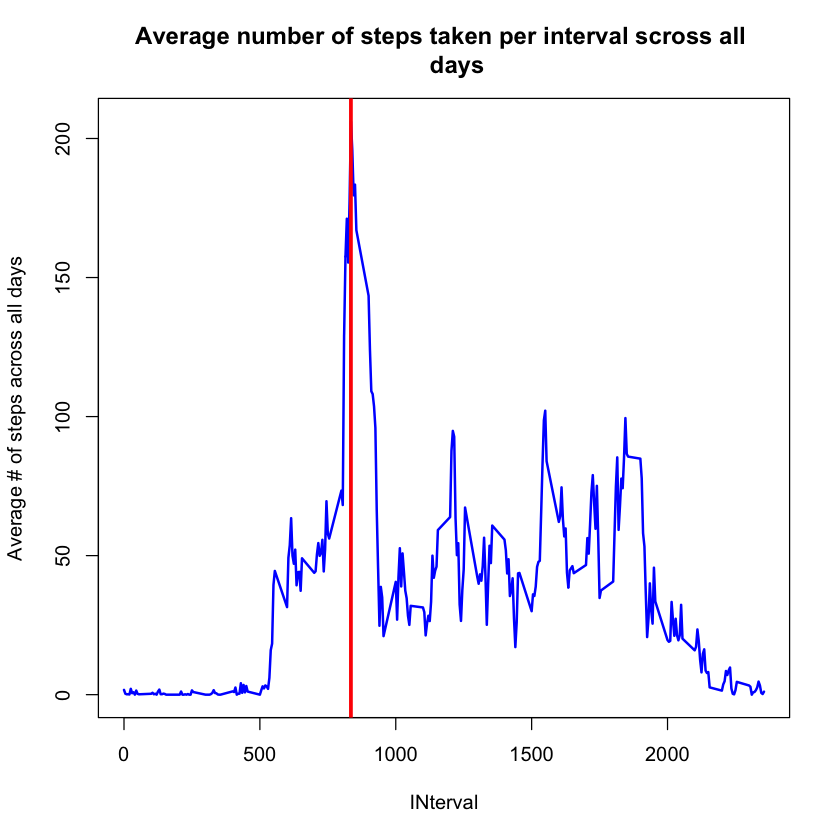

In [3]:
intervalSplit <- split(dat$steps, dat$interval)
averageStepsPerInterval <- sapply(intervalSplit, mean, na.rm = TRUE)
plot(uniqueIntervals, averageStepsPerInterval, type = "l",
    main = "Average number of steps taken per interval scross all 
    days", xlab="INterval",ylab="Average # of steps across all days",
    lwd = 2, col = "blue")

maxIntervalDays <- max(averageStepsPerInterval, na.rm = TRUE)
maxIndex = as.numeric(which(averageStepsPerInterval == maxIntervalDays))

# Plot the vertical line where max is
maxInterval <- uniqueIntervals[maxIndex]
abline(v=maxInterval, col="red", lwd=3)

In [4]:
completeRowBool <- complete.cases(dat$steps)
numNA <- sum(as.numeric(!completeRowBool))
numNA

[1] 2304

In [5]:
meanStepsPerDay[is.nan(meanStepsPerDay)] <- 0
meanColumn <- rep(meanStepsPerDay, 288)
rawSteps <- dat$steps
stepsNA <- is.na(rawSteps)
rawSteps[stepsNA] <- meanColumn[stepsNA]

datNew <- dat
datNew$steps <- rawSteps

In [6]:
stepsSplitNew <- split(datNew$steps, dates$yday)
totalStepsPerDayNew <- sapply(stepsSplitNew, sum)

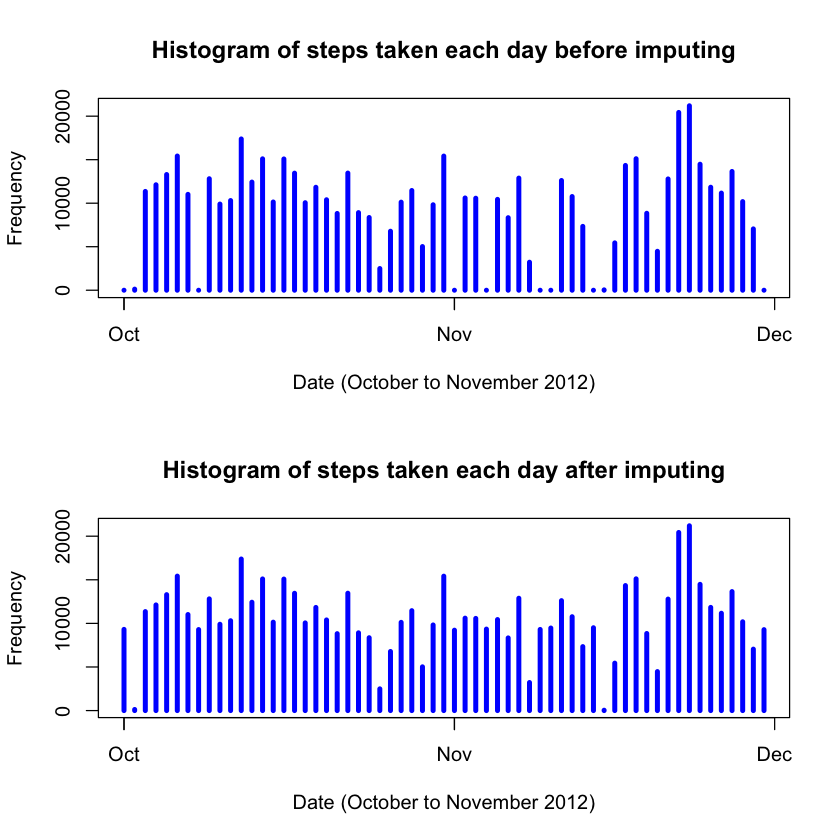

In [7]:
par(mfcol=c(2,1))
# Plot the original histogram first
plot(uniqueDates, totalStepsPerDay, 
     main="Histogram of steps taken each day before imputing", 
     xlab="Date (October to November 2012)", ylab="Frequency",
     type="h", lwd=4, col="blue")
# Plot the modified histogram after
plot(uniqueDates, totalStepsPerDayNew,
     main="Histogram of steps taken each day after imputing", 
     xlab="Date (October to November 2012)", ylab="Frequency",
     type="h", lwd=4, col="blue")


In [8]:
wdays <- dates$wday
classifyifwday <- rep(0, 17568)

# set the factor 1 for a weekday and 2 for a weekend
classifyifwday[wdays >= 1 & wdays <= 5] <- 1
classifyifwday[wdays == 0 | wdays == 6] <- 2

# create a new factor variable that has labels weekend & weekdays
daysFactor <- factor(classifyifwday, levels=c(1,2), labels=
                    c("Weekdays", "Weekends"))

datNew$typeofday <- daysFactor

datWeekdays <- datNew[datNew$typeofday == "Weekdays",]
datWeekends <- datNew[datNew$typeofday == "Weekends",]



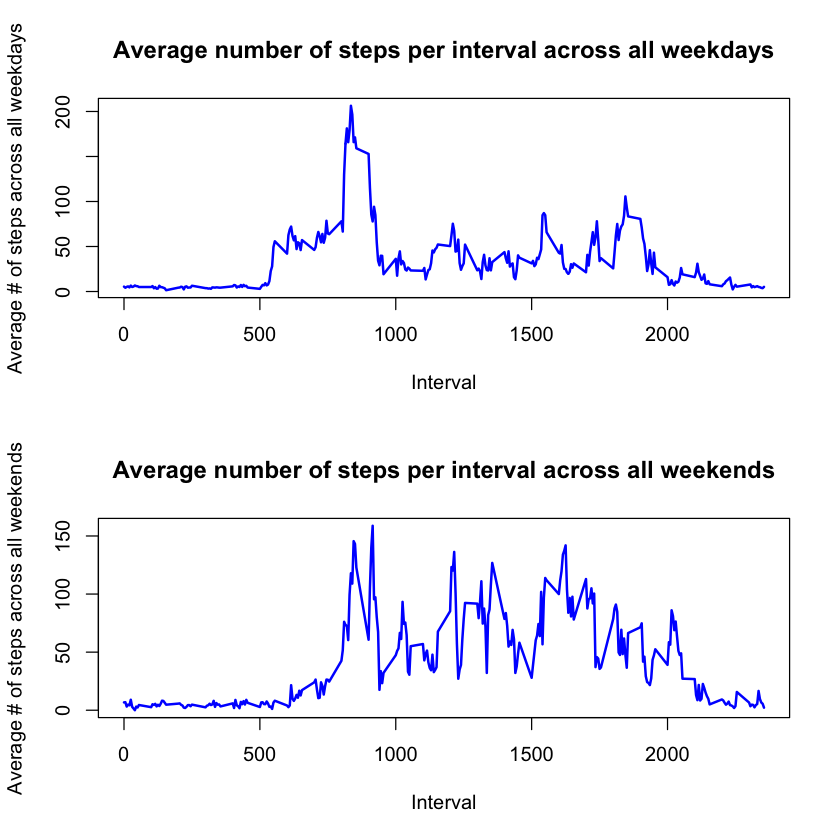

In [13]:
datSplitWeekdays <- split(datWeekdays$steps, datWeekdays$interval)
datSplitWeekends <- split(datWeekends$steps, datWeekends$interval)

meanStepsPerWeekdayInterval <- sapply(datSplitWeekdays, mean)
meanStepsPerWeekendInterval <- sapply(datSplitWeekends, mean)

par(mfcol=c(2,1))
plot(uniqueIntervals, meanStepsPerWeekdayInterval, type="l",
     main="Average number of steps per interval across all weekdays", 
     xlab="Interval", ylab="Average # of steps across all weekdays", 
     lwd=2, col="blue")
plot(uniqueIntervals, meanStepsPerWeekendInterval, type="l",
     main="Average number of steps per interval across all weekends", 
     xlab="Interval", ylab="Average # of steps across all weekends", 
     lwd=2, col="blue")

In [14]:
head(totalStepsPerDayNew)

274       275       276       277       278       279 
 9312.632   126.000 11352.000 12116.000 13294.000 15420.000

In [1]:
dat <- read.csv("activity.csv")

Warning message in file(file, "rt"):
“cannot open file 'activity.csv': No such file or directory”

ERROR: Error in file(file, "rt"): cannot open the connection
